<a href="https://colab.research.google.com/github/MZIR25/-11181049-_-Ikraam-_DM_IF-ITK/blob/main/Quiz_Data_Mining_11181049.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA MINING QUIZ** 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/MyDrive/DM/

/content/gdrive/MyDrive/DM


**Import library**

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

**Data Preparasi**

In [ ]:
iris = pd.read_csv('IRIS.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Text(0.5, 1.0, 'Distribusi panjang dan lebar kelopak bunga')

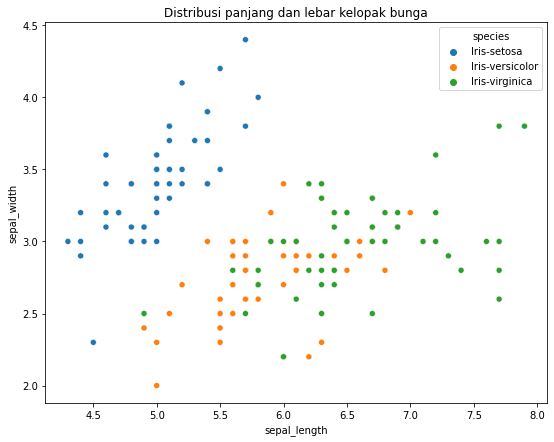

In [ ]:
plt.figure(figsize=(9,7));
sns.scatterplot(x=iris.sepal_length, y=iris.sepal_width, hue=iris.species).set_title("Dist. panjang & lebar kelopak bunga")

**MODEL**

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoding = LabelEncoder()

iris['species'] = label_encoding.fit_transform(iris['species'])
iris.sample(4)

,sepal_length,sepal_width,petal_length,petal_width,species
102,7.1,3.0,5.9,2.1,2
6,4.6,3.4,1.4,0.3,0
129,7.2,3.0,5.8,1.6,2
42,4.4,3.2,1.3,0.2,0


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y = iris.species
X = iris.drop('species',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

Tes dataset yang digunakan sebesar 40 %

In [ ]:
X.sample(4)

,sepal_length,sepal_width,petal_length,petal_width
120,6.9,3.2,5.7,2.3
96,5.7,2.9,4.2,1.3
42,4.4,3.2,1.3,0.2
111,6.4,2.7,5.3,1.9


**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_predict = naive_bayes_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

print('Akurasi Naive Bayes: ' + "{:.1%}".format(accuracy_score(y_predict, y_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.85      1.00      0.92        23
           2       1.00      0.81      0.89        21

    accuracy                           0.93        60
   macro avg       0.95      0.94      0.94        60
weighted avg       0.94      0.93      0.93        60

[[16  0  0]
 [ 0 23  0]
 [ 0  4 17]]
Akurasi Naive Bayes: 93.3%


**SVM**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('Akurasi SVM: ' + "{:.1%}".format(accuracy_score(y_predict, y_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.88      0.96      0.92        23
           2       0.95      0.86      0.90        21

    accuracy                           0.93        60
   macro avg       0.94      0.94      0.94        60
weighted avg       0.94      0.93      0.93        60

[[16  0  0]
 [ 0 22  1]
 [ 0  3 18]]
Akurasi SVM: 93.3%


**Kesimpulan:**
Perbandingan kedua metode antara Naive Bayes dan SVM yang telah dilakukan, diperoleh hasil yang sama yaitu 93.3%. jadi bisa diketahui bahwa Metode Naive Bayes dan SVM memiliki tingkat akurasi yang sama.